In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('./data/sleep_stage_respiratory_info.csv')

In [3]:
respiratory_columns = ['event_start_time' ,'event_end_time', 'event_duration', 'respiratory_type']

In [4]:
# drop respiratory_columns
sleep_df = df.drop(respiratory_columns, axis=1)

In [5]:
sleep_df.drop_duplicates(inplace=True)

In [6]:
sleep_df.reset_index(drop=True, inplace=True)

In [7]:
sleep_df

,patient_id,stage_start_time,stage_end_time,stage_duration,stage_type,raw_audio_file_id
0,995,0.0,210.0,210.0,Wake,00000995_01_000
1,995,210.0,300.0,90.0,NonREM1,00000995_01_001
2,995,300.0,870.0,570.0,NonREM2,00000995_01_002
3,995,870.0,930.0,60.0,Wake,00000995_01_003
4,995,930.0,960.0,30.0,NonREM1,00000995_01_004
...,...,...,...,...,...,...
14078,1701,17250.0,17280.0,30.0,NonREM1,00001701_05_29
14079,1701,17280.0,17700.0,420.0,NonREM2,00001701_05_30
14080,1701,17700.0,17820.0,120.0,NonREM1,00001701_05_31
14081,1701,17820.0,18840.0,1020.0,NonREM2,00001701_05_32


In [8]:
# group by patient id and show me the logest sleep duration

sleep_hr = sleep_df.groupby('patient_id')['stage_end_time'].max().sort_values(ascending=True) / 3600

In [9]:
sleep_hr_df = pd.DataFrame(sleep_hr).reset_index()

In [10]:
sleep_hr_df.rename(columns={'stage_end_time': 'sleep_duration'}, inplace=True)

In [11]:
sleep_hr_df

,patient_id,sleep_duration
0,1135,2.475000
1,1453,2.541667
2,1659,2.650000
3,1567,2.716667
4,1333,2.791667
...,...,...
281,1619,7.366667
282,1382,7.633333
283,1556,7.783333
284,1287,8.083333


In [12]:
# if sleep_duration between 2 and 3 hours make column sleep_hour = 3

sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 2) & (sleep_hr_df['sleep_duration'] < 3), 'sleep_hour'] = 3
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 3) & (sleep_hr_df['sleep_duration'] < 4), 'sleep_hour'] = 4
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 4) & (sleep_hr_df['sleep_duration'] < 5), 'sleep_hour'] = 5
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 5) & (sleep_hr_df['sleep_duration'] < 6), 'sleep_hour'] = 6
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 6) & (sleep_hr_df['sleep_duration'] < 7), 'sleep_hour'] = 7
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 7) & (sleep_hr_df['sleep_duration'] < 8), 'sleep_hour'] = 8
sleep_hr_df.loc[(sleep_hr_df['sleep_duration'] >= 8) & (sleep_hr_df['sleep_duration'] < 9), 'sleep_hour'] = 9

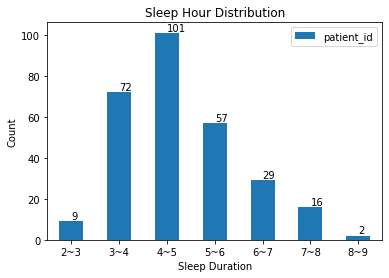

In [23]:
sleep_hr_df.drop('sleep_duration', axis=1).groupby('sleep_hour').count().plot(kind='bar')
# show only patient_id column
plt.xticks(rotation=0)
# xticks 2~3, 3~4, 4~5, 5~6, 6~7, 7~8, 8~9
plt.xticks(np.arange(7), ('2~3', '3~4', '4~5', '5~6', '6~7', '7~8', '8~9'))
# add title and axis names
plt.title('Sleep Hour Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
# add count on top of each bar
for index, data in enumerate(sleep_hr_df.groupby('sleep_hour').count()['patient_id']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()

In [22]:
sleep_hr_df

,patient_id,sleep_duration,sleep_hour
0,1135,2.475000,3.0
1,1453,2.541667,3.0
2,1659,2.650000,3.0
3,1567,2.716667,3.0
4,1333,2.791667,3.0
...,...,...,...
281,1619,7.366667,8.0
282,1382,7.633333,8.0
283,1556,7.783333,8.0
284,1287,8.083333,9.0


In [25]:
8.99 * 3600

32364.0